# The CIFAR-10 Image Classification Problem

In [34]:
!pip install tensorflow-gpu==2.0.0-rc0

### Importing the necessary libraries

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [36]:
import tensorflow as tf
from tensorflow import keras

### Importing the dataset

In [37]:
data = keras.datasets.cifar10

In [38]:
(X_train, Y_train), (X_test, Y_test) = data.load_data()

In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


Plotting an example

Image Label:  [6]


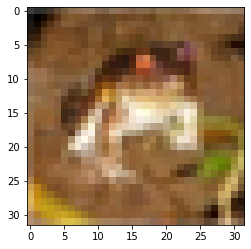

In [39]:
plt.figure()
plt.imshow(X_train[0])

print('Image Label: ', Y_train[0])

### Data Preprocessing

In [40]:
print(np.max(X_train))
print(np.max(X_test))

255
255


In [41]:
X_train = X_train/255
X_test = X_test/255

### CNN Initialization

In [42]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, BatchNormalization

In [201]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPool2D(pool_size=(2, 2), strides=(1, 1), padding='same'))

model.add(Flatten())

model.add(Dense(1536, activation='relu'))
model.add(Dense(1536, activation='relu'))
model.add(Dense(1536, activation='relu'))
model.add(Dense(1536, activation='relu'))
model.add(Dense(1536, activation='relu'))
model.add(Dense(1536, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [202]:
model.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_46 (Conv2D)           (None, 16, 16, 32)        896       
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_26 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dense_155 (Dense)            (None, 1536)              12584448  
_________________________________________________________________
dense_156 (Dense)            (None, 1536)              2360832   
_________________________________________________________________
dense_157 (Dense)            (None, 1536)              2360832   
_________________________________________________________________
dense_158 (Dense)            (None, 1536)            

In [203]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

## Training the model

In [204]:
history = model.fit(X_train, Y_train, batch_size=500, epochs=10)

Train on 50000 samples
Epoch 1/10
50000/50000 [==============================] - 6s 123us/sample - loss: 1.9439 - accuracy: 0.2347
Epoch 2/10
50000/50000 [==============================] - 5s 107us/sample - loss: 1.4193 - accuracy: 0.4688
Epoch 3/10
50000/50000 [==============================] - 5s 107us/sample - loss: 1.1819 - accuracy: 0.5730
Epoch 4/10
50000/50000 [==============================] - 5s 105us/sample - loss: 1.0203 - accuracy: 0.6369
Epoch 5/10
50000/50000 [==============================] - 5s 107us/sample - loss: 0.8748 - accuracy: 0.6917
Epoch 6/10
50000/50000 [==============================] - 5s 106us/sample - loss: 0.7588 - accuracy: 0.7322
Epoch 7/10
50000/50000 [==============================] - 5s 108us/sample - loss: 0.6295 - accuracy: 0.7808
Epoch 8/10
50000/50000 [==============================] - 5s 108us/sample - loss: 0.5046 - accuracy: 0.8246
Epoch 9/10
50000/50000 [==============================] - 5s 107us/sample - loss: 0.4089 - accuracy: 0.8578
Epoch

## Learning Curves

Plotting the accuracy vs epoch curve

Text(0, 0.5, 'Accuracy')

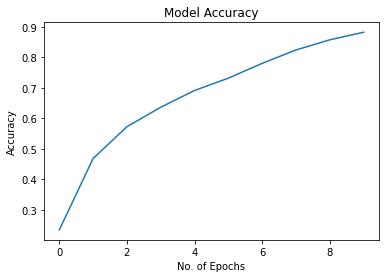

In [205]:
plt.figure()
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')

Plotting the loss vs epoch curve

Text(0, 0.5, 'Loss')

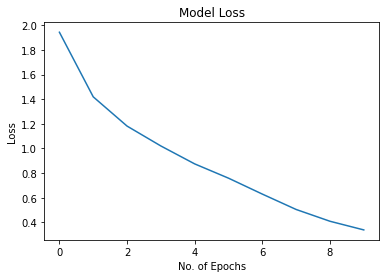

In [206]:
plt.figure()
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('No. of Epochs')
plt.ylabel('Loss')

## Predicting the test results

In [207]:
Y_pred = model.predict_classes(X_test)

Accuracy of model on test examples

In [169]:
from sklearn.metrics import accuracy_score

In [208]:
print(accuracy_score(Y_test, Y_pred))

0.6432


## Confusion Matrix

In [209]:
!pip install mlxtend

In [210]:
from mlxtend.plotting import plot_confusion_matrix

In [211]:
from sklearn.metrics import confusion_matrix

In [212]:
cm = confusion_matrix(Y_pred, Y_test)

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fab2039a978>)

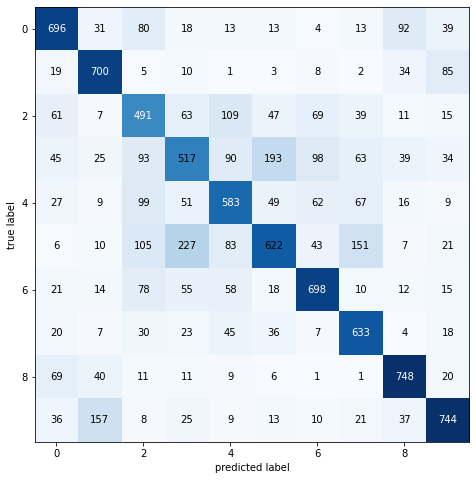

In [213]:
plot_confusion_matrix(conf_mat = cm, figsize = (8,8))

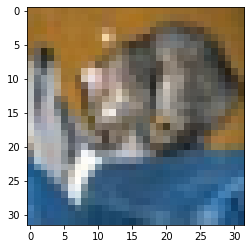

In [214]:
plt.figure()
plt.imshow(X_test[0])

In [215]:
print('Predicted Label: ', Y_pred[0])
print('True Label: ', Y_test[0])

Predicted Label:  3
True Label:  [3]
